In [32]:
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('Desktop/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
### generating nan values in df

In [36]:
list_ = []
for i in range(5000):
    list_.append(random.randrange(0, 10000, 1))
df.loc[list_]=np.nan

In [37]:
df.isnull().sum()

RowNumber          3953
CustomerId         3953
Surname            3953
CreditScore        3953
Geography          3953
Gender             3953
Age                3953
Tenure             3953
Balance            3953
NumOfProducts      3953
HasCrCard          3953
IsActiveMember     3953
EstimatedSalary    3953
Exited             3953
dtype: int64

### looking how many missing values we have

In [123]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:14]
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

39.53

### drop rows with null values

In [38]:
df_drop= df.copy()

In [39]:
df_drop.dropna(inplace=True)
df_drop.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### mcar missing completely at random

In [ ]:
#hypo -  those who are younger might not want to reveal there income

In [181]:
df_inc = df[~df['EstimatedSalary'].isnull()]
df_inc_not = df[df['EstimatedSalary'].isnull()]
print(df_inc.shape , df_inc_not.shape)

(6047, 14) (3953, 14)


In [182]:
df_inc_not.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_inc.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6047.000000,6.047000e+03,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000
mean,5002.599636,1.569014e+07,651.489664,38.870845,5.019018,76738.550402,1.526707,0.705970,0.513478,100170.437123,0.200761
std,2882.507954,7.184977e+04,97.689647,10.460708,2.875715,62318.732698,0.579938,0.455643,0.499860,57561.934848,0.400603
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2492.500000,1.562784e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51108.310000,0.000000
50%,4996.000000,1.568915e+07,653.000000,37.000000,5.000000,97361.660000,1.000000,1.000000,1.000000,99504.030000,0.000000
75%,7474.500000,1.575238e+07,720.000000,44.000000,7.000000,127531.525000,2.000000,1.000000,1.000000,149489.115000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
### can  be checked this way

# filling a missing value with 
# previous ones /after ones

In [ ]:
# filling a missing value with 
# previous ones   
df_drop.fillna(method ='pad')
# filling a missing value with 
# after ones  
df.fillna(method ='bfill')
# will replace  Nan value in dataframe with value -99   
data.replace(to_replace = np.nan, value = -99)

### replacing with statistical approach mean /median/ mode

In [47]:
df_stat = df.copy()

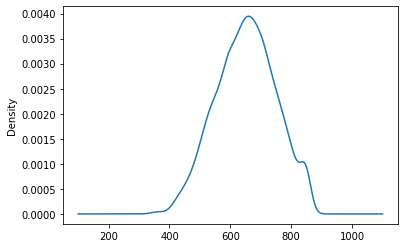

In [41]:
s = pd.Series(df_stat['CreditScore'].tolist())
s.plot.kde()
plt.show()

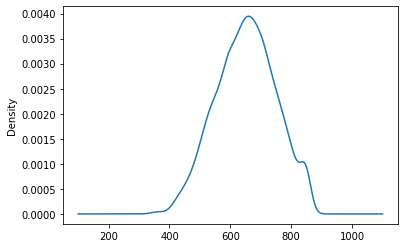

In [48]:
# mode
df_stat['CreditScore'].replace(np.nan,df_stat['CreditScore'].mode())
df_stat['CreditScore'] = df_stat['CreditScore'].round() # credit score not in decimal
s = pd.Series(df_stat['CreditScore'].tolist())
s.plot.kde()
plt.show()

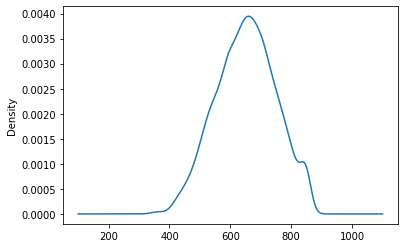

In [46]:
# median
df_stat['CreditScore'].replace(np.nan,df_stat['CreditScore'].median())
df_stat['CreditScore'] = df_stat['CreditScore'].round() # credit score not in decimal
s = pd.Series(df_stat['CreditScore'].tolist())
s.plot.kde()
plt.show()

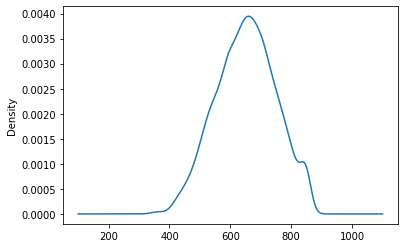

In [42]:
# mean
df_stat['CreditScore'].replace(np.nan,df_stat['CreditScore'].mean())
df_stat['CreditScore'] = df_stat['CreditScore'].round() # credit score not in decimal
s = pd.Series(df_stat['CreditScore'].tolist())
s.plot.kde()
plt.show()

### for categorical variables

In [80]:
df_cat = df.copy()

In [56]:
### geography column has missing values so we we fill all missing values with 'u' and label encod it

In [81]:
df_cat['Geography'] = df_cat['Geography'].fillna('U')

In [82]:
df_cat['Geography'].value_counts()

U          3953
France     3029
Germany    1527
Spain      1491
Name: Geography, dtype: int64

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat['laGeography'] = le.fit_transform(df_cat.Geography.values)

In [84]:
df_cat['Geography'].value_counts()

U          3953
France     3029
Germany    1527
Spain      1491
Name: Geography, dtype: int64

### using ml to predict missing values

In [86]:
df.describe()
### cannot be applied if the feature has high varance

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6047.000000,6.047000e+03,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000
mean,5002.599636,1.569014e+07,651.489664,38.870845,5.019018,76738.550402,1.526707,0.705970,0.513478,100170.437123,0.200761
std,2882.507954,7.184977e+04,97.689647,10.460708,2.875715,62318.732698,0.579938,0.455643,0.499860,57561.934848,0.400603
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2492.500000,1.562784e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51108.310000,0.000000
50%,4996.000000,1.568915e+07,653.000000,37.000000,5.000000,97361.660000,1.000000,1.000000,1.000000,99504.030000,0.000000
75%,7474.500000,1.575238e+07,720.000000,44.000000,7.000000,127531.525000,2.000000,1.000000,1.000000,149489.115000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [88]:
df_ml = df.copy()

In [112]:
lin_ = pd.DataFrame()
lin_ = df_ml.loc[:,['CreditScore','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Balance','EstimatedSalary']]
lin_.dropna(inplace=True)

In [115]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lin_['Gender'] = le.fit_transform(lin_.Gender.values)

In [116]:
lin_.head(3)

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Balance,EstimatedSalary
0,619.0,0,42.0,2.0,1.0,1.0,1.0,0.00,101348.88
2,502.0,0,42.0,8.0,3.0,1.0,0.0,159660.80,113931.57
4,850.0,0,43.0,2.0,1.0,1.0,1.0,125510.82,79084.10


In [117]:
lin_['Gender'].value_counts()

1    3282
0    2765
Name: Gender, dtype: int64

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [119]:
X  = lin_.iloc[:,:-1]
y = lin_.iloc[:,-1]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [121]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-2.30033912e+00 -3.40640334e+02 -1.20750421e+02  2.18097450e+02
  1.68358689e+03 -2.56635763e+03 -1.73228599e+02  1.89077653e-02]
Intercept: 103598.51289042085
Root mean squared error:  3220192035.055748
R2 score:  0.0004738039625208357


ValueError: x and y must be the same size

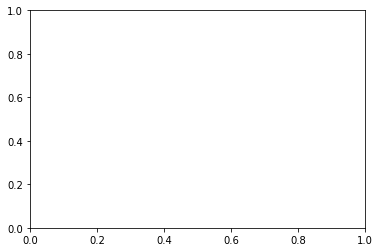

In [122]:
# plotting values

# data points
plt.scatter(X_test, y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(X_test, y_predicted, color='r')
plt.show()

### interpolate

In [185]:
df_inter = df.copy()

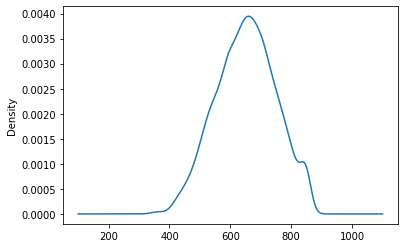

In [131]:
s = pd.Series(df_inter['CreditScore'].tolist())
s.plot.kde()
plt.show()

In [137]:
# linear it works by calculating distance between two points and takes their average
df_inter['CreditScore'].interpolate()

0    619.00
1    560.50
2    502.00
3    676.00
4    850.00
5    645.00
6    510.50
7    376.00
8    406.25
9    436.50
Name: CreditScore, dtype: float64

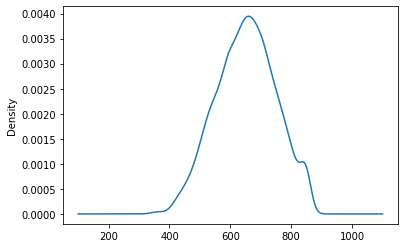

In [133]:
s = pd.Series(df_inter['CreditScore'].tolist())
s.plot.kde()
plt.show()

In [141]:
df_inter.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,6.0,15574012.0,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,15656148.0,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
! pip install -U scikit-learn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.21.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [199]:
from sklearn.impute import KNNImputer

ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\__init__.py)

In [198]:
from fancyimpute import KaNN, NuclearNormMinimization, SoftImpute, BiScaler

ModuleNotFoundError: No module named 'fancyimpute'

In [ ]:
# possible interpolate methos- ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 
# 'barycentric', 'polynomial', 'krogh', 'piecewise_polynomial', 'pchip', 'akima', 'spline', 'from_derivatives']

In [195]:
## quarditic 
df_inter['CreditScore'].interpolate(method='nearest').iloc[:10]

0    619.0
1    619.0
2    502.0
3    502.0
4    850.0
5    645.0
6    645.0
7    376.0
8    376.0
9    376.0
Name: CreditScore, dtype: float64

In [140]:
## polynomial 
df_inter['CreditScore'].interpolate(method='polynomial', order=2).iloc[:10]

0    619.000000
1    466.311512
2    502.000000
3    726.065463
4    850.000000
5    645.000000
6    469.291193
7    376.000000
8    358.548554
9    416.936855
Name: CreditScore, dtype: float64

In [149]:
df_inter['CreditScore'].interpolate(method='cubic').iloc[:10]

0    619.000000
1    364.169850
2    502.000000
3    756.080150
4    850.000000
5    645.000000
6    459.515472
7    376.000000
8    378.100014
9    427.865829
Name: CreditScore, dtype: float64

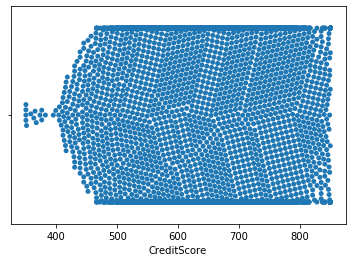

In [148]:
sns.swarmplot(x='CreditScore',data=df_inter)
plt.show()

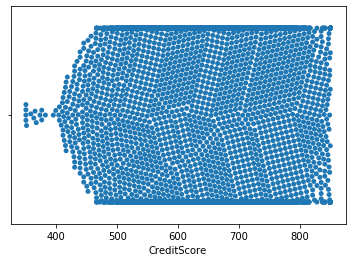

In [150]:
sns.swarmplot(x='CreditScore',data=df_inter)
plt.show()

### can perform eda for finding missing patterns

In [151]:
df['CreditScore'].value_counts()

850.0    146
667.0     36
705.0     35
678.0     34
670.0     33
        ... 
399.0      1
367.0      1
432.0      1
469.0      1
417.0      1
Name: CreditScore, Length: 450, dtype: int64

In [172]:
df_cut = df.copy()

In [178]:
bins_=[300,350,400,450,500,550,600,650,700,750,800,850]
bin_labels = [1,2,3,4,5,6,7,8,9,10,11]
df_cut['credit_bins'] = pd.cut(df_cut['CreditScore'],bins=bins_,labels = bin_labels)

In [179]:
df_cut['credit_bins'].value_counts()

8     1181
7     1091
9      926
6      863
5      593
10     587
11     410
4      279
3      102
2       11
1        4
Name: credit_bins, dtype: int64

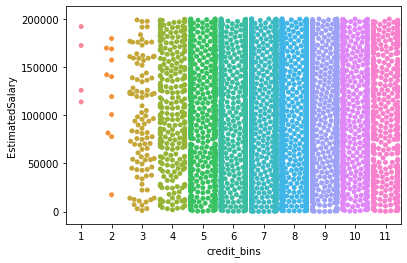

In [169]:
sns.swarmplot(x='credit_bins', y ='EstimatedSalary',data=df_cut)
plt.show()

In [180]:
## pipeline
# # define the imputer
# imputer = SimpleImputer(missing_values=nan, strategy='mean')
# # define the model
# lda = LinearDiscriminantAnalysis()
# # define the modeling pipeline
# pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])

1631    1
8723    1
8762    1
9624    1
Name: credit_bins, dtype: category
Categories (11, int64): [1 < 2 < 3 < 4 ... 8 < 9 < 10 < 11]

In [ ]:
# q cut
# bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
# df['quantile_ex_3'] = pd.qcut(df['ext price'],
#                               q=[0, .2, .4, .6, .8, 1],
#                               labels=bin_labels_5)